In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10

### Загрузите файл HR.csv в pandas dataframe

In [3]:
hr_data = pd.read_csv('HR.csv')
hr_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Рассчитайте основные статистики для переменных: среднее, медиана, мода, мин/макс, среднее отклонение.

In [4]:
hr_data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


В describe нет моды, посчистаем её отдельно. Если в результате в строке 1 есть NaN, мода в этом столбце одна и она в строке 0. Если в строке 1 не NaN, то моды две - в строке 0 и 1

In [5]:
hr_data.mode()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


### Рассчитайте и визуализируйте корреляционную матрицу для количественных переменных. Определите две самые скоррелированные и две наименее скоррелированные переменные.

Cчитаем, что переменная left тоже количественная, хотя по сути это категориальная переменная - либо покинул(а), либо нет

In [6]:
hr_corr = hr_data[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years']].corr()
hr_corr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


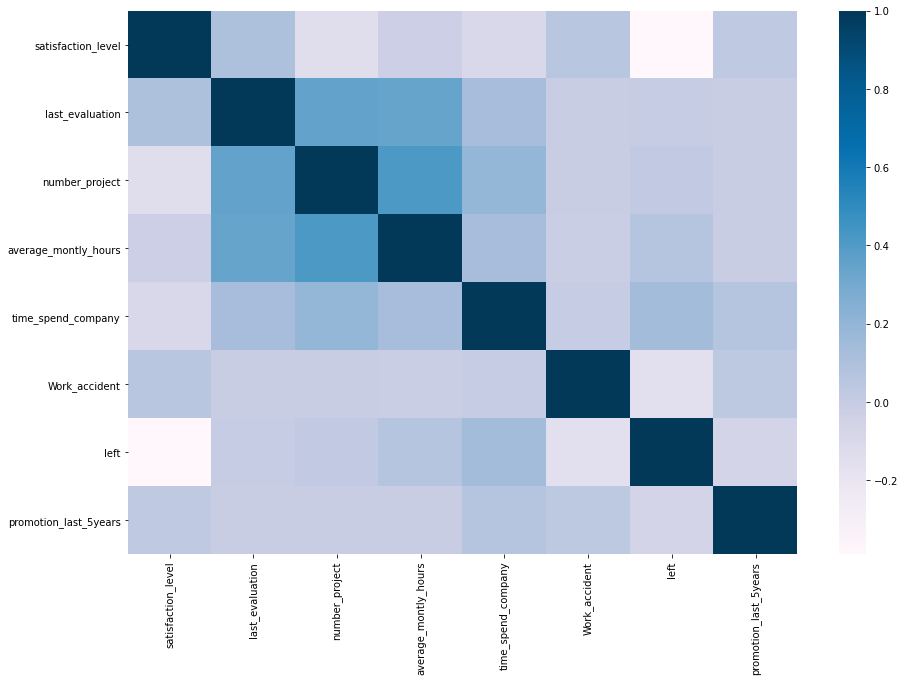

In [7]:
import seaborn as sns
sns.heatmap(hr_corr, cmap='PuBu')

Наибольшая корреляция между number_project и average_montly_hours: 0.417211 - чем больше проектов человек ведет, тем больше работает\
Наименьшая корреляция между satisfaction_level и left: -0.154622 - если челоек неудовлетворен работой он склонен к увольнению\
Наименьшая по модулю корреляция между time_spend_company и Work_accident: 0.002120	

### Рассчитайте, сколько сотрудников работает в каждом департаменте.

Далее везде будем считать, что речь идёт только о не уволившихся сотрудниках, если не указано иное

Не забудем убрать ушедших сотрудников, применим count к группировке по департаментам и переименуем любую колонку на headcount. Оставим только ее и название дерартемента. Отсортируем для красоты

In [8]:
curent_hr_data = hr_data[hr_data['left'] != 1]

curent_hr_data.groupby('department').count().rename(columns={'left':'headcount'})[['headcount']].reset_index().sort_values(by = 'headcount', ascending= False)

,department,headcount
7,sales,3126
9,technical,2023
8,support,1674
0,IT,954
6,product_mng,704
1,RandD,666
5,marketing,655
2,accounting,563
4,management,539
3,hr,524


### Покажите распределение сотрудников по зарплатам.

In [9]:
current_workers_by_salary = curent_hr_data.groupby('salary').count()[['left']].rename(columns={'left':'workers_count'}).sort_values(by = 'workers_count')
current_workers_by_salary

,workers_count
salary,
high,1155
medium,5129
low,5144


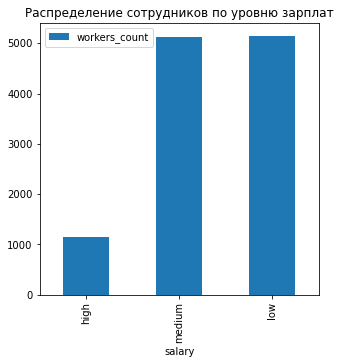

In [10]:
current_workers_by_salary.plot(title='Распределение сотрудников по уровню зарплат', kind = 'bar', figsize=(5, 5))

### Покажите распределение сотрудников по зарплатам в каждом департаменте по отдельности

In [11]:
curent_hr_data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
2000,0.58,0.74,4,215,3,0,0,0,sales,low
2001,0.82,0.67,2,202,3,0,0,0,sales,low
2002,0.45,0.69,5,193,3,0,0,0,sales,low
2003,0.78,0.82,5,247,3,0,0,0,sales,low
2004,0.49,0.60,3,214,2,0,0,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14206,0.90,0.55,3,259,10,1,0,1,management,high
14207,0.74,0.95,5,266,10,0,0,1,management,high
14208,0.85,0.54,3,185,10,0,0,1,management,high
14209,0.33,0.65,3,172,10,0,0,1,marketing,high


In [12]:
workers_by_dept_salary = curent_hr_data.groupby(['department', 'salary']).count().rename(columns = {'left':'headcount'})[['headcount']]
#  поменяем внешний вид: сделаем уровни зп названиями столцов, приведем их в логический порядок (по возрастанию) и раскрасим - чем темнее, тем больше работает людей
workers_by_dept_salary.unstack()\
    [[('headcount','low'), ('headcount', 'medium'), ('headcount', 'high')]]\
    .style.background_gradient(axis = None, cmap = 'PuBu')

In [13]:
# раскрасим так, чтобы было видно распределение в каждом департаменте
workers_by_dept_salary.unstack()\
    [[('headcount','low'), ('headcount', 'medium'), ('headcount', 'high')]]\
    .style.background_gradient(axis = 1, cmap = 'PuBu')

#### Проверьте гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом.

Среднее время на роботе в зависимости от ЗП

In [14]:
curent_hr_data.groupby('salary').mean()[['average_montly_hours']]

,average_montly_hours
salary,
high,200.348052
low,198.617418
medium,199.214272


Среднее отклонение часов на работе в зависимости от ЗП. 46 часов в мес - почти вне зависимости от ЗП

In [15]:
curent_hr_data.groupby('salary').std()[['average_montly_hours']]

,average_montly_hours
salary,
high,46.565231
low,45.488365
medium,45.679143


Средние значения часов на работе для разных зп - high и low - отличаются примерно на 1,7 часов. Это намного (почти в 30 раз) меньше стандартного отклонения в 45 часов. При такой близости средних в терминах стандартных отклонений, гипотеза о равенстве средних времен на работе для дорогих и недорогих сотрудников не может быть отброшена со сколько либо значимой вероятностью какой бы (разумный) критерий мы не применяли

### Рассчитайте следующие показатели среди уволившихся и не уволившихся сотрудников (по отдельности):
- доля сотрудников с повышением за последние 5 лет;
- средняя степень удовлетворённости;
- среднее количество проектов.


In [16]:
left_hr_data = hr_data[hr_data['left'] == 1]

In [17]:
d = {\
    'Работающие': [curent_hr_data['promotion_last_5years'].mean(), curent_hr_data['satisfaction_level'].mean(), curent_hr_data['number_project'].mean()], \
    'Ушедшие': [left_hr_data['promotion_last_5years'].mean(), left_hr_data['satisfaction_level'].mean(), left_hr_data['number_project'].mean()]\
        }

pd.DataFrame(columns = ['Работающие', 'Ушедшие'], index= ['доля сотрудников с повышением за последние 5 лет', 'средняя степень удовлетворённости', 'среднее количество проектов'], data=d)

,Работающие,Ушедшие
доля сотрудников с повышением за последние 5 лет,0.026251,0.005321
средняя степень удовлетворённости,0.666810,0.440098
среднее количество проектов,3.786664,3.855503


### Разделите данные на тестовую и обучающую выборки

In [18]:
hr_data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [19]:
features = hr_data[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years']]
target = hr_data['left']

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=42)

### Постройте модель LDA, которая показывает, уволился ли сотрудник на основе имеющихся факторов (кроме department и salary)

In [21]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [22]:
lda = LinearDiscriminantAnalysis()

In [23]:
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [24]:
lda.coef_, lda.intercept_

(array([[-4.58366087e+00,  6.57019075e-01, -2.18430857e-01,
          4.47682750e-03,  2.22165799e-01, -1.04525663e+00,
         -1.10730495e+00]]),
 array([0.15265168]))

### Оцените качество модели на тестовой выборке. Используйте метод accuracy

In [25]:
from sklearn.metrics import accuracy_score

In [26]:
accuracy_score(y_test, lda.predict(X_test))

0.7536

Не очень высокая точность, но достаточная, чтобы пользоваться моделью. Считается, что для LDA accuracy в 70-90% вполне рабочие